In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import sklearn

In [5]:
haar=cv2.CascadeClassifier('D:/data science/Module-2/model/haarcascade_frontalface_default.xml')

model_svm=pickle.load(open('D:/data science/Module-2/data/model_svm.pickle','rb'))
model_pca=pickle.load(open('D:/data science/Module-2/data/pca_50.pickle','rb'))

In [28]:
data1=np.load('D:/data science/Module-2/data/data_10000_norm.npz')

In [30]:
data1.files

['arr_0', 'arr_1']

In [31]:
d=data1['arr_0']

In [32]:
mean1=d.mean

In [51]:
mean=pickle.load(open('D:/data science/Module-2/model/mean_preprocess.pickle','rb'))

In [58]:
gender_pre=['Male','Female']
font=cv2.FONT_HERSHEY_SIMPLEX

In [78]:
def pipeline_model(img,color='bgr'):
    #convert to grayscale
    if color=='bgr':
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    #step 3 crop using haar classifier
    faces=haar.detectMultiScale(gray,1.5,3)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        roi=gray[y:y+h,x:x+w]
        #step4 Normalization(0-1)
        roi=roi/255.0
        #step5:Resize Image(100,100)
        if roi.shape[1]>100:
            roi_resize=cv2.resize(roi,(100,100),cv2.INTER_AREA)
        else:
            roi_resize=cv2.resize(roi,(100,100),cv2.INTER_CUBIC)
         #step6 Flatenning(1x10,000)
        roi_reshape=roi_resize.reshape(1,10000)
        #step7 subtract with mean
        roi_mean=roi_reshape-mean
        #step 8 get eigen image
        eigen_image=model_pca.transform(roi_mean)
        #step 9 pass to ml model
        results=model_svm.predict_proba(eigen_image)[0]
        #step10
        predict=results.argmax()
        score=results[predict]
        #step 11
        text='%s:%0.2f'%(gender_pre[predict],score)
        cv2.putText(img,text,(x,y),font,1,(0,255,0),2)
    return img

In [79]:
from PIL import Image

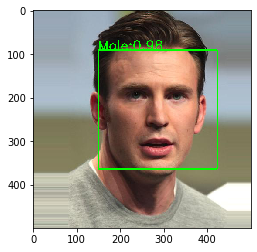

In [80]:
#test data
test_data=('D:/data science/Module-2/data/male_000281.jpg')
color='bgr'
#step1 read image
img=Image.open(test_data)
#convert into array
img=np.array(img)
#pass into pipeline model
img=pipeline_model(img)
plt.imshow(img)

In [83]:
cap = cv2.VideoCapture('D:/data science/Module-2/data/video.mp4')

while True:
    ret, frame = cap.read() # bgr
    
    if ret == False:
        break
    frame = pipeline_model(frame,color='bgr')
    cv2.imshow('Gender Detector',frame)
    if cv2.waitKey(10) == ord('s'): # press s to exit  --#esc key (27), 
        break
        
cv2.destroyAllWindows()
cap.release()